In [1]:
! git clone https://github.com/APARNA-AMBARAPU/CNN--SDC-Simulator.git

fatal: destination path 'CNN--SDC-Simulator' already exists and is not an empty directory.


In [2]:
! ls CNN--SDC-Simulator

drive.py  driving_log.csv  IMG	README.md


In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('CNN--SDC-Simulator/driving_log.csv',names = ['center','left','right','steering','throttle','reverse','speed'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8222 entries, 0 to 8221
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   center    8222 non-null   object 
 1   left      8222 non-null   object 
 2   right     8222 non-null   object 
 3   steering  8222 non-null   float64
 4   throttle  8222 non-null   float64
 5   reverse   8222 non-null   float64
 6   speed     8222 non-null   float64
dtypes: float64(4), object(3)
memory usage: 449.8+ KB


In [6]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0,0.0,0.0,2.431211e-07
1,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0,0.0,0.0,7.316122e-06
2,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0,0.0,0.0,2.573447e-06
3,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0,0.0,0.0,4.271285e-06
4,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0,0.0,0.0,1.345338e-05


In [7]:
data = data[['center','steering']]
data.head()

,center,steering
0,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0
1,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0
2,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0
3,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0
4,C:\Users\Hari\OneDrive\Documents\New folder\IM...,0.0


In [0]:
import ntpath
def change_path_name(path):
  head,tail = ntpath.split(path)
  return tail

In [9]:
data['center'] = data['center'].apply(change_path_name)
data.head()

,center,steering
0,center_2020_05_29_21_24_19_079.jpg,0.0
1,center_2020_05_29_21_24_19_148.jpg,0.0
2,center_2020_05_29_21_24_19_217.jpg,0.0
3,center_2020_05_29_21_24_19_293.jpg,0.0
4,center_2020_05_29_21_24_19_362.jpg,0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

(array([  32.,   13.,   15.,   12.,   28.,   46.,   36.,  104.,   58.,
         135.,  152.,   62., 6864.,  136.,   88.,  133.,  121.,   40.,
          50.,   36.,   13.,   16.,   11.,   21.]),
 array([-1.        , -0.91666667, -0.83333333, -0.75      , -0.66666667,
        -0.58333333, -0.5       , -0.41666667, -0.33333333, -0.25      ,
        -0.16666667, -0.08333333,  0.        ,  0.08333333,  0.16666667,
         0.25      ,  0.33333333,  0.41666667,  0.5       ,  0.58333333,
         0.66666667,  0.75      ,  0.83333333,  0.91666667,  1.        ]),
 <a list of 24 Patch objects>)

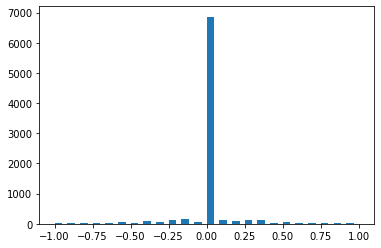

In [11]:
bins = np.linspace(-1,+1,25)
plt.hist(data['steering'],bins,width = 0.05)


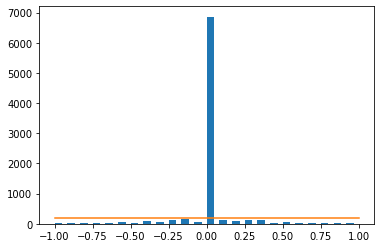

In [12]:
sample_no_threshold = 200
plt.hist(data['steering'],bins,width = 0.05)
plt.plot([-1,1],[200,200])

In [0]:
import random
from sklearn.utils import shuffle

In [14]:
bins

array([-1.        , -0.91666667, -0.83333333, -0.75      , -0.66666667,
       -0.58333333, -0.5       , -0.41666667, -0.33333333, -0.25      ,
       -0.16666667, -0.08333333,  0.        ,  0.08333333,  0.16666667,
        0.25      ,  0.33333333,  0.41666667,  0.5       ,  0.58333333,
        0.66666667,  0.75      ,  0.83333333,  0.91666667,  1.        ])

In [0]:
removed_lst = []
for i in range(len(bins)-1):
  lst = []
  for j in range(len(data['steering'])):
    if data['steering'][j] >= bins[i] and data['steering'][j] < bins[i+1]:
      lst.append(j)
  lst = shuffle(lst)
  lst = lst[sample_no_threshold:]
  removed_lst.extend(lst)

In [16]:
data.drop(data.index[removed_lst],inplace=True)
print('Length of Data',len(data))

Length of Data 1558


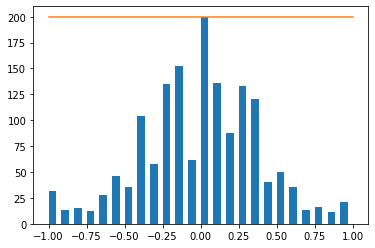

In [17]:
plt.hist(data['steering'],bins,width = 0.05)
plt.plot([-1,1],[200,200])

In [0]:
def dataset_image_load (data):
  path_of_img = []
  steer_ang = []
  for i in range(len(data)):
    df_row = data.iloc[i]
    center = df_row[0]
    path_of_img.append('CNN--SDC-Simulator/IMG/'+center)
    steer_ang.append(df_row[1])
  path_of_img = np.asarray(path_of_img)
  steer_ang = np.asarray(steer_ang)
  return path_of_img, steer_ang


In [0]:
images_path,steering_angle = dataset_image_load(data)

In [20]:
print(len(images_path))
print(len(steering_angle))

1558
1558


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(images_path,steering_angle,test_size = 0.2,random_state = 2)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1246,)
(1246,)
(312,)
(312,)


Text(0.5, 1.0, 'Validation Dataset')

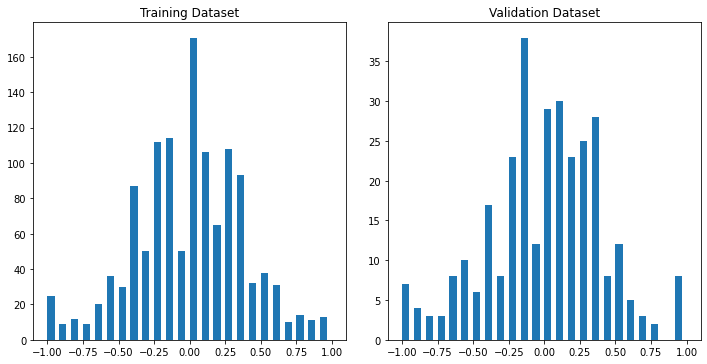

In [24]:
 fig,axes = plt.subplots(1,2,figsize = (10,5))
 fig.tight_layout()

 axes[0].hist(y_train,bins,width = 0.05)
 axes[0].set_title('Training Dataset')

 axes[1].hist(y_val,bins,width = 0.05)
 axes[1].set_title('Validation Dataset')

In [0]:
import cv2
import matplotlib.image as mpimg

In [0]:
def preprocess(image):
  img = mpimg.imread(image)
  img = img[60:140,:,:]
  img=  cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img


In [0]:
X_train = np.array(list(map(preprocess,X_train)))
X_val = np.array(list(map(preprocess,X_val)))

Text(0.5, 1.0, 'Image from Validation dataset')

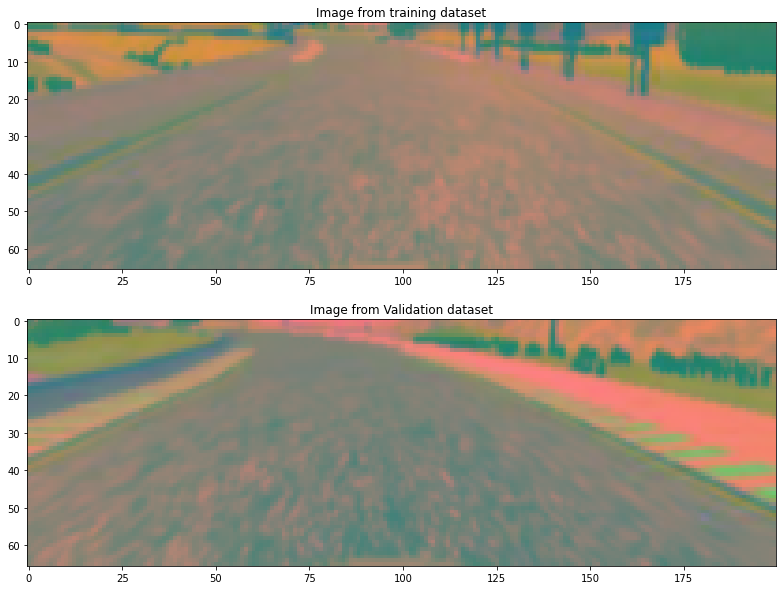

In [28]:
fig,axes = plt.subplots(2,1,figsize = (15,10))
r = random.randint(0,len(X_val))
axes[0].imshow(X_train[r])
axes[0].set_title('Image from training dataset')
axes[1].imshow(X_val[r])
axes[1].set_title('Image from Validation dataset')

In [29]:
print(X_train.shape)
print(X_val.shape)

(1246, 66, 200, 3)
(312, 66, 200, 3)


In [30]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
def nvidia_model1():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides = (2,2),activation = 'relu',input_shape = (66,200,3)))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation = 'relu'))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation = 'relu'))
  model.add(Convolution2D(64,(3,3),activation = 'relu'))
  model.add(Convolution2D(64,(3,3),activation = 'relu'))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(100,activation = 'relu'))
  model.add(Dropout(0.5))

  model.add(Dense(50,activation = 'relu'))
  model.add(Dense(10,activation = 'relu'))
  model.add(Dense(1))

  optimizer = Adam(lr = 0.001)
  model.compile(loss= 'mse',optimizer = optimizer)
  
  return model

In [32]:
model1 = nvidia_model1()
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [33]:
history1 = model1.fit(X_train,y_train, validation_data=[X_val,y_val],batch_size = 100,epochs = 30, shuffle = 1,verbose = 1)

Train on 1246 samples, validate on 312 samples
Epoch 1/30
1246/1246 [==============================] - 3s 3ms/step - loss: 0.1463 - val_loss: 0.1617
Epoch 2/30
1246/1246 [==============================] - 0s 328us/step - loss: 0.1436 - val_loss: 0.1544
Epoch 3/30
1246/1246 [==============================] - 0s 328us/step - loss: 0.1352 - val_loss: 0.1163
Epoch 4/30
1246/1246 [==============================] - 0s 333us/step - loss: 0.1168 - val_loss: 0.1100
Epoch 5/30
1246/1246 [==============================] - 0s 327us/step - loss: 0.0976 - val_loss: 0.0895
Epoch 6/30
1246/1246 [==============================] - 0s 332us/step - loss: 0.0842 - val_loss: 0.0688
Epoch 7/30
1246/1246 [==============================] - 0s 336us/step - loss: 0.0714 - val_loss: 0.0634
Epoch 8/30
1246/1246 [==============================] - 0s 341us/step - loss: 0.0602 - val_loss: 0.0673
Epoch 9/30
1246/1246 [==============================] - 0s 340us/step - loss: 0.0600 - val_loss: 0.0610
Epoch 10/30
1246/12

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

Text(0.5, 1.0, 'LOSS')

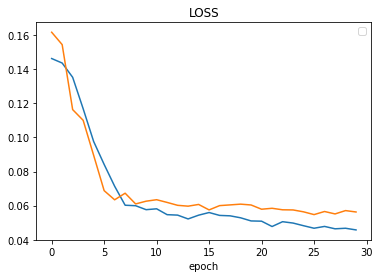

In [34]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.legend('Training loss','validation loss')
plt.xlabel('epoch')
plt.title('LOSS')

In [0]:
def nvidia_model2():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides = (2,2),activation = 'elu',input_shape = (66,200,3)))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation = 'elu'))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation = 'elu'))
  model.add(Convolution2D(64,(3,3),activation = 'elu'))
  model.add(Convolution2D(64,(3,3),activation = 'elu'))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(100,activation = 'elu'))
  model.add(Dropout(0.5))

  model.add(Dense(50,activation = 'elu'))
  model.add(Dropout(0.5))

  model.add(Dense(10,activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))

  optimizer = Adam(lr = 0.001)
  model.compile(loss= 'mse',optimizer = optimizer)
  
  return model

In [36]:
model2 = nvidia_model2()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [37]:
h2 = model2.fit(X_train,y_train, validation_data=[X_val,y_val],epochs = 30,verbose = 1, batch_size = 100, shuffle=1)

Train on 1246 samples, validate on 312 samples
Epoch 1/30
1246/1246 [==============================] - 1s 657us/step - loss: 0.7112 - val_loss: 0.1635
Epoch 2/30
1246/1246 [==============================] - 0s 363us/step - loss: 0.2208 - val_loss: 0.1402
Epoch 3/30
1246/1246 [==============================] - 0s 344us/step - loss: 0.1734 - val_loss: 0.1340
Epoch 4/30
1246/1246 [==============================] - 0s 341us/step - loss: 0.1512 - val_loss: 0.1301
Epoch 5/30
1246/1246 [==============================] - 0s 339us/step - loss: 0.1344 - val_loss: 0.1102
Epoch 6/30
1246/1246 [==============================] - 0s 340us/step - loss: 0.1243 - val_loss: 0.1016
Epoch 7/30
1246/1246 [==============================] - 0s 339us/step - loss: 0.1157 - val_loss: 0.1045
Epoch 8/30
1246/1246 [==============================] - 0s 337us/step - loss: 0.1134 - val_loss: 0.0943
Epoch 9/30
1246/1246 [==============================] - 0s 343us/step - loss: 0.1095 - val_loss: 0.0889
Epoch 10/30
1246/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
Se

Text(0.5, 0, 'epoch')

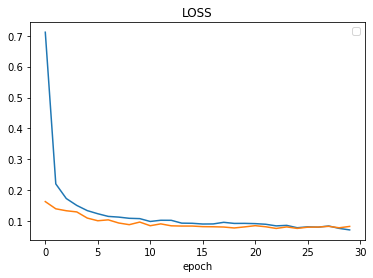

In [38]:
loss2 = h2.history['loss']
val_loss2 = h2.history['val_loss']
plt.plot(loss2)
plt.plot(val_loss2)
plt.legend('training','validation')
plt.title('LOSS')
plt.xlabel('epoch')

In [0]:
model2.save('model2.h5')

In [0]:
from google.colab import files
files.download('model2.h5')

The 'model2.h5' performed poorly on the training track and didnot generalise well to the testing track.